<a href="https://colab.research.google.com/github/imondal202017/ML-DL-project/blob/main/Testing_for_credit_card_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas  as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, f1_score, recall_score
import seaborn as sns

In [ ]:
def generate_model_report(y_actual, y_predicted):
  print("Accuracy = " , accuracy_score(y_actual, y_predicted))
  print("Precision = " ,precision_score(y_actual, y_predicted))
  print("Recall = " ,recall_score(y_actual, y_predicted))
  print("F1 Score = " ,f1_score(y_actual, y_predicted))
  pass

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
dataset = pd.read_csv(F"/content/gdrive/My Drive/creditcard.csv")

In [ ]:
dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
dataset['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
X = dataset.drop(['Class'], axis=1)
y = dataset['Class']

In [ ]:
from sklearn.model_selection import train_test_split 
  
# split into 70:30 ration 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0) 

In [ ]:
dataset1 = pd.read_csv(F"/content/gdrive/My Drive/Gen_25k_WGAN.csv")

In [ ]:
#Concatanating two csv files
frames = [dataset, dataset1]
result = pd.concat(frames)

result

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Unnamed: 0
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0,NaN
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0,NaN
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0,NaN
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0,NaN
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25175,-0.116587,0.536164,-0.361055,0.254613,-0.435392,-0.106112,-0.529784,0.513972,-0.397100,-0.760215,0.289042,-0.411035,0.041718,-0.504857,0.208985,-0.542584,-1.091621,-0.438770,0.306819,0.052657,0.181895,-0.011438,0.103130,0.064138,-0.042830,0.003381,0.171020,0.075632,0.055824,1,25176.0
25176,-0.058938,0.088405,-0.196693,0.229634,-0.022862,-0.045045,0.009195,0.047469,-0.048272,-0.172643,0.009386,-0.099142,-0.005782,-0.465469,0.023889,-0.004577,-0.088760,-0.039984,-0.012100,0.062346,0.029643,0.018857,0.109320,-0.099349,0.018847,0.010598,-0.078573,0.007228,0.030299,1,25177.0
25177,-0.067465,0.431713,-0.424370,0.311660,-0.336841,-0.250091,-0.632424,0.532552,-0.377406,-1.029399,0.438374,-0.522002,-0.030659,-0.726228,0.056823,-0.690476,-1.301920,-0.506052,0.298907,0.066938,0.245370,-0.066813,0.113462,0.003268,-0.071333,0.017712,0.245738,0.081963,-0.068385,1,25178.0
25178,-0.140861,0.429370,-0.429212,0.503962,-0.655565,-0.106681,-0.868645,0.496534,-0.645417,-1.164875,0.404941,-0.458891,0.193073,-0.509814,0.012640,-0.655076,-1.576991,-0.631612,0.361717,-0.056852,0.196982,0.047373,-0.075876,0.068519,-0.186535,0.073969,-0.161035,-0.200952,0.128374,1,25179.0


In [ ]:
result.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class',
       'Unnamed: 0'],
      dtype='object')

In [ ]:
df = result.drop(['Unnamed: 0'], axis=1)

In [ ]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25175,-0.116587,0.536164,-0.361055,0.254613,-0.435392,-0.106112,-0.529784,0.513972,-0.397100,-0.760215,0.289042,-0.411035,0.041718,-0.504857,0.208985,-0.542584,-1.091621,-0.438770,0.306819,0.052657,0.181895,-0.011438,0.103130,0.064138,-0.042830,0.003381,0.171020,0.075632,0.055824,1
25176,-0.058938,0.088405,-0.196693,0.229634,-0.022862,-0.045045,0.009195,0.047469,-0.048272,-0.172643,0.009386,-0.099142,-0.005782,-0.465469,0.023889,-0.004577,-0.088760,-0.039984,-0.012100,0.062346,0.029643,0.018857,0.109320,-0.099349,0.018847,0.010598,-0.078573,0.007228,0.030299,1
25177,-0.067465,0.431713,-0.424370,0.311660,-0.336841,-0.250091,-0.632424,0.532552,-0.377406,-1.029399,0.438374,-0.522002,-0.030659,-0.726228,0.056823,-0.690476,-1.301920,-0.506052,0.298907,0.066938,0.245370,-0.066813,0.113462,0.003268,-0.071333,0.017712,0.245738,0.081963,-0.068385,1
25178,-0.140861,0.429370,-0.429212,0.503962,-0.655565,-0.106681,-0.868645,0.496534,-0.645417,-1.164875,0.404941,-0.458891,0.193073,-0.509814,0.012640,-0.655076,-1.576991,-0.631612,0.361717,-0.056852,0.196982,0.047373,-0.075876,0.068519,-0.186535,0.073969,-0.161035,-0.200952,0.128374,1


In [ ]:
from sklearn.utils import shuffle

df = shuffle(df)
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
118430,-0.813551,1.148432,1.193213,-0.090933,-0.422345,-0.647176,0.190521,0.563100,-0.675488,-0.342097,0.982304,0.275267,-0.973719,0.851618,0.217400,0.564601,-0.420042,0.304975,0.304253,-0.047666,-0.140736,-0.575680,0.046495,0.281676,-0.230715,0.059306,0.127902,0.044252,9.42,0
95689,1.198812,-0.969565,0.909720,-0.812698,-1.216420,0.515598,-1.339885,0.427396,-0.476665,0.714754,1.616466,-0.444043,-1.073679,0.062327,1.062174,1.146964,0.441212,-1.104418,-0.210440,0.003541,0.488631,1.285265,-0.059285,-0.264482,0.198341,-0.006078,0.054256,0.010274,34.99,0
91610,1.213833,0.161000,0.284940,0.595666,-0.490887,-0.794973,-0.153765,0.057824,0.077323,-0.054376,1.287490,-0.145866,-1.867651,0.308577,0.614021,0.769865,-0.142212,0.443389,0.105983,-0.200143,-0.259726,-0.882025,0.141482,0.234141,0.118692,0.083949,-0.039860,0.016147,0.89,0
129965,1.225177,0.168757,0.072796,0.095908,-0.261607,-1.271037,0.455166,-0.397420,-0.260585,-0.190791,0.059021,0.931365,1.276036,0.185860,0.720122,0.065440,-0.273862,-1.152889,0.260774,0.086376,-0.405984,-1.252329,0.158653,0.436603,0.128672,0.613954,-0.100414,0.013315,46.94,0
5713,-0.545670,-2.901884,-0.871167,1.149674,-1.137228,-0.284644,1.209627,-0.426366,1.531127,-1.013368,0.554788,-2.490524,0.947042,1.985933,-0.183826,-0.459720,1.137024,-0.649028,-0.557076,1.682091,0.346419,-0.732046,-0.858590,0.132129,0.082109,0.984522,-0.285508,0.144034,938.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65887,1.407130,-0.537124,-0.106270,-0.896690,-0.426771,-0.222588,-0.364089,-0.171646,-0.870947,0.617031,-1.556334,-0.199997,1.200420,-0.095699,1.002985,-0.738384,-0.612785,0.990249,-0.119293,-0.306089,-0.796292,-1.932182,0.093707,-1.021725,0.060339,0.720093,-0.059072,0.010674,48.03,0
115608,-0.514291,0.330057,2.294308,1.710427,-0.346569,0.794737,-0.053952,0.407909,0.658735,-0.578915,-1.339025,0.201124,-1.037942,-0.598717,-1.311177,-1.599722,1.187402,-0.942479,1.300076,0.004862,-0.286005,-0.442484,0.075934,0.064667,-0.401431,-0.436173,0.220742,0.157765,30.90,0
97745,-0.225205,1.104231,0.923668,0.525182,0.403466,-1.096357,1.145981,-0.236157,-0.731139,-0.365628,-0.632975,-0.456757,-0.764388,0.588464,0.546456,-0.273902,-0.258840,-0.119344,-0.109973,-0.131495,0.071329,0.173627,-0.276957,0.380146,0.391812,-0.334698,0.011288,0.015919,7.50,0
101571,-2.388319,-3.025867,2.020354,-1.020846,2.032398,-2.361322,-1.433862,0.106624,1.387121,-1.066308,1.316582,1.820838,0.730885,-0.343329,-0.123245,-0.366497,-0.720517,0.864425,0.131676,0.877275,0.596206,1.138675,0.545653,0.565124,-0.377488,-0.868038,-0.031959,0.036934,78.00,0


In [ ]:
A = df.drop(['Class'], axis=1)
B = df['Class']

In [ ]:
A

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
118430,-0.813551,1.148432,1.193213,-0.090933,-0.422345,-0.647176,0.190521,0.563100,-0.675488,-0.342097,0.982304,0.275267,-0.973719,0.851618,0.217400,0.564601,-0.420042,0.304975,0.304253,-0.047666,-0.140736,-0.575680,0.046495,0.281676,-0.230715,0.059306,0.127902,0.044252,9.42
95689,1.198812,-0.969565,0.909720,-0.812698,-1.216420,0.515598,-1.339885,0.427396,-0.476665,0.714754,1.616466,-0.444043,-1.073679,0.062327,1.062174,1.146964,0.441212,-1.104418,-0.210440,0.003541,0.488631,1.285265,-0.059285,-0.264482,0.198341,-0.006078,0.054256,0.010274,34.99
91610,1.213833,0.161000,0.284940,0.595666,-0.490887,-0.794973,-0.153765,0.057824,0.077323,-0.054376,1.287490,-0.145866,-1.867651,0.308577,0.614021,0.769865,-0.142212,0.443389,0.105983,-0.200143,-0.259726,-0.882025,0.141482,0.234141,0.118692,0.083949,-0.039860,0.016147,0.89
129965,1.225177,0.168757,0.072796,0.095908,-0.261607,-1.271037,0.455166,-0.397420,-0.260585,-0.190791,0.059021,0.931365,1.276036,0.185860,0.720122,0.065440,-0.273862,-1.152889,0.260774,0.086376,-0.405984,-1.252329,0.158653,0.436603,0.128672,0.613954,-0.100414,0.013315,46.94
5713,-0.545670,-2.901884,-0.871167,1.149674,-1.137228,-0.284644,1.209627,-0.426366,1.531127,-1.013368,0.554788,-2.490524,0.947042,1.985933,-0.183826,-0.459720,1.137024,-0.649028,-0.557076,1.682091,0.346419,-0.732046,-0.858590,0.132129,0.082109,0.984522,-0.285508,0.144034,938.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65887,1.407130,-0.537124,-0.106270,-0.896690,-0.426771,-0.222588,-0.364089,-0.171646,-0.870947,0.617031,-1.556334,-0.199997,1.200420,-0.095699,1.002985,-0.738384,-0.612785,0.990249,-0.119293,-0.306089,-0.796292,-1.932182,0.093707,-1.021725,0.060339,0.720093,-0.059072,0.010674,48.03
115608,-0.514291,0.330057,2.294308,1.710427,-0.346569,0.794737,-0.053952,0.407909,0.658735,-0.578915,-1.339025,0.201124,-1.037942,-0.598717,-1.311177,-1.599722,1.187402,-0.942479,1.300076,0.004862,-0.286005,-0.442484,0.075934,0.064667,-0.401431,-0.436173,0.220742,0.157765,30.90
97745,-0.225205,1.104231,0.923668,0.525182,0.403466,-1.096357,1.145981,-0.236157,-0.731139,-0.365628,-0.632975,-0.456757,-0.764388,0.588464,0.546456,-0.273902,-0.258840,-0.119344,-0.109973,-0.131495,0.071329,0.173627,-0.276957,0.380146,0.391812,-0.334698,0.011288,0.015919,7.50
101571,-2.388319,-3.025867,2.020354,-1.020846,2.032398,-2.361322,-1.433862,0.106624,1.387121,-1.066308,1.316582,1.820838,0.730885,-0.343329,-0.123245,-0.366497,-0.720517,0.864425,0.131676,0.877275,0.596206,1.138675,0.545653,0.565124,-0.377488,-0.868038,-0.031959,0.036934,78.00


In [ ]:
# classifier object 
lr = LogisticRegression()
  
# train the model on train set 
lr.fit(X_train, y_train) 
  
prediction_lr = lr.predict(X_test) 
  
# print classification report 
#print(classification_report(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
generate_model_report(y_test, prediction_lr)

Accuracy =  0.999204147794436
Precision =  0.8910891089108911
Recall =  0.6122448979591837
F1 Score =  0.7258064516129031


In [ ]:
# classifier object 
KNN = KNeighborsClassifier(n_neighbors=3)
  
# train the model on train set 
KNN.fit(X_train, y_train) 
  
prediction_KNN = KNN.predict(X_test) 
  
# print classification report 
#print(classification_report(y_test, predictions))

In [ ]:
generate_model_report(y_test, prediction_KNN)

Accuracy =  0.9993914071369217
Precision =  0.9357798165137615
Recall =  0.6938775510204082
F1 Score =  0.7968750000000001


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(A, B)

prediction_dt = dt.predict(X_test)

#print(classification_report(y_test, predictions))

In [ ]:
generate_model_report(y_test, prediction_dt)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0


In [ ]:
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
#from sklearn.svm import SVC

In [ ]:
rf = RandomForestClassifier(n_estimators=20)
rf.fit(X_train,y_train)

prediction_rf = rf.predict(X_test)

#print(classification_report(y_test, predictions))

In [ ]:
generate_model_report(y_test, prediction_rf)

Accuracy =  0.9995201479348805
Precision =  0.9491525423728814
Recall =  0.7619047619047619
F1 Score =  0.8452830188679245


In [ ]:
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features= 1.0, n_estimators=20)
bg.fit(X_train,y_train)

prediction_bg = bg.predict(X_test)

#print(classification_report(y_test, predictions))

In [ ]:
generate_model_report(y_test, prediction_bg)

Accuracy =  0.9994616293903538
Precision =  0.9243697478991597
Recall =  0.7482993197278912
F1 Score =  0.8270676691729323


In [ ]:
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators= 5, learning_rate= 1)
adb.fit(X_train, y_train)

prediction_adb = adb.predict(X_test)

#print(classification_report(y_test, predictions))

In [ ]:
generate_model_report(y_test, prediction_adb)

Accuracy =  0.9992860737567735
Precision =  0.8115942028985508
Recall =  0.7619047619047619
F1 Score =  0.7859649122807018


In [ ]:
svm = SVC(kernel= 'poly', degree= 2)

In [ ]:
svm.fit(A, B)

prediction_svm = svm.predict(X_test)

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
#knn = KNeighborsClassifier(n_neighbors=3)
#svm = SVC()
evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting= 'hard')

In [ ]:
evc.fit(X_train,y_train)

prediction_evc = evc.predict(X_test)

#print(classification_report(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
generate_model_report(y_test, prediction_evc)

Accuracy =  0.9992626663389628
Precision =  0.9565217391304348
Recall =  0.5986394557823129
F1 Score =  0.7364016736401674


In [ ]:
from xgboost import XGBClassifier

In [ ]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
prediction_xgb = xgb.predict(X_test)

#print(classification_report(y_test, y_pred))

In [ ]:
generate_model_report(y_test, prediction_xgb)

Accuracy =  0.9994850368081645
Precision =  0.9256198347107438
Recall =  0.7619047619047619
F1 Score =  0.8358208955223881


In [ ]:
pip install imbalanced-learn

In [ ]:
import imblearn
print(imblearn.__version__)

0.4.3


/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

Random Under Sample

In [ ]:
minority_class_len = len(dataset[dataset['Class'] == 1])
print(minority_class_len)

492


In [ ]:
majority_class_indices = dataset[dataset['Class'] == 0].index
print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [ ]:
random_mojority_indices = np.random.choice(majority_class_indices,
                                           minority_class_len,
                                           replace=False)
print(len(random_mojority_indices))

492


In [ ]:
minority_class_indices = dataset[dataset['Class'] == 1].index
print(minority_class_indices)

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


In [ ]:
under_sample_indices = np.concatenate([minority_class_indices,random_mojority_indices])

In [ ]:
under_sample = dataset.loc[under_sample_indices]

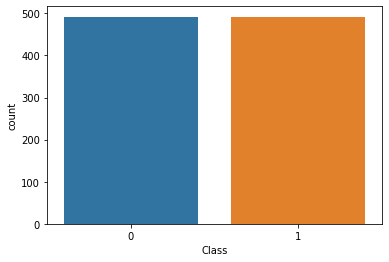

In [ ]:
sns.countplot(x='Class', data=under_sample)

In [ ]:
under_sample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11402,1.176292,0.284144,0.279630,0.667985,0.045410,-0.053290,-0.219988,0.053027,1.164054,-0.515574,2.407673,-1.917649,1.234910,1.471234,-0.002462,0.477906,0.668967,0.201814,-0.345930,-0.150796,-0.380940,-0.903171,0.115611,-0.424918,0.110331,0.089305,-0.043328,0.008007,11.99,0
90495,1.081087,0.182989,1.205088,2.550358,-0.477535,0.411164,-0.433424,0.100364,-0.120165,0.506725,-1.173820,0.390361,1.192016,-0.530738,0.077099,0.901930,-0.823991,0.135642,-0.882941,0.025648,0.108269,0.373443,-0.165158,-0.101865,0.481578,0.131424,0.035568,0.039118,48.83,0
5442,-0.723547,1.063572,1.809969,0.646871,0.009725,0.352366,0.240156,0.084051,1.071990,-0.329873,2.316928,-1.069865,2.298955,1.158235,-1.551714,-1.000251,1.111211,-0.177923,0.628087,0.110244,-0.037354,0.451583,-0.148149,0.262001,-0.284513,0.410128,0.082737,0.188286,6.99,0
147127,2.015422,-0.934729,-1.079822,-0.495055,-0.431808,0.111852,-0.651539,0.013061,-0.262284,0.826844,0.230437,0.773050,0.555833,0.093578,-0.368801,-1.269329,-0.621483,1.851070,-0.393739,-0.457715,-0.275882,-0.315759,0.165574,0.247386,-0.130111,-0.369601,0.019768,-0.036893,64.31,0


In [ ]:
from sklearn.utils import shuffle
under_sample = shuffle(under_sample)

In [ ]:
under_sample

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
5642,-3.943565,-2.678028,2.792117,3.877222,-2.286225,2.063882,2.191719,-0.841329,2.358712,0.188396,-0.055959,-2.724376,1.688141,-0.744502,-1.921683,-0.033497,0.732588,0.233460,0.385219,-2.039862,-0.897165,1.085426,1.651936,0.779549,0.806803,0.379836,0.159759,-0.271501,601.13,0
71647,1.150162,-0.456865,1.693303,1.618077,-1.161934,1.122138,-1.293046,0.457534,1.974046,-0.385018,-2.303545,0.360651,-0.224977,-1.234358,-1.374137,-0.134266,-0.052333,0.348428,0.353027,-0.165076,0.020217,0.607609,-0.251227,-0.387444,0.689632,-0.045520,0.121762,0.031333,1.00,0
113736,0.932682,-0.099508,1.042489,2.344843,-0.508850,0.760745,-0.602832,0.464403,-0.280874,0.794248,0.698253,-0.527226,-1.958574,0.627551,0.697106,1.210456,-0.790404,0.472757,-1.154396,-0.119350,0.079275,-0.089649,0.001948,-0.397895,0.054268,-0.052161,0.008837,0.029629,82.47,0
16415,0.288029,0.965681,-1.459495,1.921863,-1.912414,-1.130282,-2.814263,0.648663,-0.695263,-3.465689,2.351619,-3.826705,-0.767570,-4.852867,1.664863,-2.617361,-4.835558,-1.921752,-0.385884,0.330917,0.603127,0.380690,-0.064125,0.271380,0.337220,0.626156,0.565125,0.305925,23.36,1
263080,2.132386,0.705608,-3.530759,0.514779,1.527175,-1.716268,1.132791,-0.574214,0.128904,-1.000805,-0.191191,-0.323794,-0.572456,-1.422064,0.314684,-0.387162,1.734742,0.610976,-0.221267,-0.211167,0.163739,0.703910,-0.245076,0.460049,0.920281,-0.216586,-0.026219,-0.025001,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175218,1.720461,-0.295333,-2.138346,1.166567,0.608091,-0.666844,0.762790,-0.228541,-0.222374,0.498518,0.748016,0.061416,-1.638641,1.330128,-0.248396,-0.165621,-0.558336,0.224378,-0.204933,-0.024477,0.253686,0.347244,-0.101980,0.670938,0.335704,-0.546466,-0.077168,-0.042403,162.87,0
167305,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,4.315076,-4.938284,-1.105710,-8.490813,1.003626,-1.949123,-3.093013,0.124087,0.886747,-1.118687,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,105.89,1
229712,0.908637,2.849024,-5.647343,6.009415,0.216656,-2.397014,-1.819308,0.338527,-2.819883,-4.063098,2.941190,-6.151362,-1.989529,-9.150951,-0.604290,-1.952290,-2.892555,-0.912058,-1.563740,0.241921,0.407260,-0.397435,-0.080006,-0.168597,0.465058,0.210510,0.648705,0.360224,1.18,1
96643,0.987541,-0.376039,-0.131469,-0.258684,0.604977,1.478823,-0.201679,0.351365,0.065900,-0.396518,0.159282,0.867049,1.273168,0.097487,2.157876,-0.736691,0.505263,-2.281875,-1.268214,0.072327,0.003608,0.020254,-0.004195,-1.704823,0.011049,1.069945,-0.019446,0.000683,93.50,0


In [ ]:
A = under_sample.drop(['Class'], axis=1)
B = under_sample['Class']

In [ ]:
# classifier object 
lr_rus = LogisticRegression()
  
# train the model on train set 
lr_rus.fit(A, B) 
  
predictions = lr_rus.predict(X_test) 
  
# print classification report 
#print(classification_report(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
generate_model_report(y_test, predictions)

Accuracy =  0.9689500602741009
Precision =  0.04928057553956835
Recall =  0.9319727891156463
F1 Score =  0.09361120601298259


In [ ]:
KNN = KNeighborsClassifier(n_neighbors=3)
  
# train the model on train set 
KNN.fit(A, B) 
  
predictions = KNN.predict(X_test)

In [ ]:
generate_model_report(y_test, predictions)

Accuracy =  0.9419261964116429
Precision =  0.027106658809664112
Recall =  0.9387755102040817
F1 Score =  0.052691867124856816


In [ ]:
dt_rus = DecisionTreeClassifier()
dt_rus.fit(X_train, y_train)

predictions = dt_rus.predict(X_test)

In [ ]:
generate_model_report(y_test, predictions)

Accuracy =  0.9993211848834895
Precision =  0.8296296296296296
Recall =  0.7619047619047619
F1 Score =  0.7943262411347518


In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0))) 
  
# import SMOTE module from imblearn library 
# pip install imblearn (if you don't have imblearn in your system) 
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 
  
print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 199019 



/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (398038, 29)
After OverSampling, the shape of train_y: (398038,) 

After OverSampling, counts of label '1': 199019
After OverSampling, counts of label '0': 199019


In [ ]:
lr_SMOTE = LogisticRegression() 
lr_SMOTE.fit(X_train_res, y_train_res) 
prediction_SMOTE_lr = lr_SMOTE.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
generate_model_report(y_test, prediction_SMOTE_lr)

Accuracy =  0.9829008812892805
Precision =  0.08312182741116751
Recall =  0.891156462585034
F1 Score =  0.15206035983749275


In [ ]:
KNN_SMOTE = KNeighborsClassifier(n_neighbors=3) 
KNN_SMOTE.fit(X_train_res, y_train_res) 
prediction_SMOTE_KNN = KNN_SMOTE.predict(X_test)

In [ ]:
generate_model_report(y_test, prediction_SMOTE_KNN)

Accuracy =  0.9977762953079831
Precision =  0.42402826855123676
Recall =  0.8163265306122449
F1 Score =  0.558139534883721


In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1))) 
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

ada = ADASYN()
X_resampled, y_resampled = ada.fit_sample(X, y)

print('After OverSampling, the shape of train_X: {}'.format(X_resampled.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_resampled.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_resampled == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_resampled == 0)))

Before OverSampling, counts of label '1': 345
Before OverSampling, counts of label '0': 199019 



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (568555, 29)
After OverSampling, the shape of train_y: (568555,) 

After OverSampling, counts of label '1': 284240
After OverSampling, counts of label '0': 284315


In [ ]:
lr_ada = LogisticRegression() 
lr_ada.fit(X_resampled, y_resampled) 
prediction_ada_lr = lr_ada.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
generate_model_report(y_test, prediction_ada_lr)

Accuracy =  0.9455777535901128
Precision =  0.029073415603430245
Recall =  0.9455782312925171
F1 Score =  0.056412337662337664


In [ ]:
KNN_ada = KNeighborsClassifier(n_neighbors=3) 
KNN_ada.fit(X_train_res, y_train_res) 
prediction_ada_KNN = KNN_ada.predict(X_test)

In [ ]:
generate_model_report(y_test, prediction_ada_KNN)

Accuracy =  0.9977762953079831
Precision =  0.42402826855123676
Recall =  0.8163265306122449
F1 Score =  0.558139534883721


In [ ]:
DT_SMOTE = DecisionTreeClassifier() 
DT_SMOTE.fit(X_train_res, y_train_res) 
prediction_SMOTE = DT_SMOTE.predict(X_test)

In [ ]:
generate_model_report(y_test, prediction_SMOTE)

Accuracy =  0.99750711000316
Precision =  0.3877551020408163
Recall =  0.7755102040816326
F1 Score =  0.5170068027210885


In [ ]:
df1 = pd.read_csv(F"/content/gdrive/My Drive/Course project testing datasets/Gen_25k.csv")

In [ ]:
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.109150,0.240125,-0.189470,0.250111,-0.021955,-0.101137,-0.208111,0.148374,-0.299190,-0.485622,0.203578,-0.346439,-0.119928,-0.531557,-0.046789,-0.220834,-0.546204,-0.127089,-0.075881,0.023101,0.082730,-0.067394,-0.046766,-0.090622,0.079208,0.026661,0.105483,0.050094,-0.112072,1.0
1,-0.119872,0.251408,-0.140016,0.150052,-0.088338,-0.158808,-0.210718,0.127031,-0.305359,-0.533893,0.227047,-0.321106,0.025527,-0.460810,0.057471,-0.370056,-0.616272,-0.344370,0.051192,0.065509,0.069881,-0.019398,0.005966,0.004219,-0.069417,0.058065,0.147044,0.118216,-0.162776,1.0
2,-0.362767,0.713791,-0.502891,0.550096,-0.562912,-0.173860,-0.905334,0.699555,-0.998186,-1.460049,0.446928,-0.682757,0.275978,-0.870967,0.111657,-0.948673,-1.999559,-0.936494,0.479325,-0.009367,0.282052,-0.179327,-0.050537,-0.025652,-0.109952,-0.152449,-0.034316,0.214237,0.190417,1.0
3,-0.121165,0.188088,-0.114296,0.112318,-0.093363,-0.164083,-0.156647,0.111453,-0.208516,-0.474703,0.245990,-0.286180,-0.010551,-0.404083,0.100256,-0.354439,-0.495291,-0.303271,-0.018095,0.026235,0.085842,0.023494,0.004144,0.078357,-0.053273,0.082877,0.107443,0.095274,-0.194136,1.0
4,-0.003316,0.067358,-0.178075,0.223723,-0.156318,-0.131703,-0.264958,0.065245,-0.118713,-0.506403,0.439589,-0.362929,-0.245319,-0.546209,0.044554,-0.314615,-0.711670,-0.133855,0.051776,0.113589,0.116119,-0.015188,-0.035281,0.040048,0.172794,-0.108122,0.219027,0.169527,0.072747,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25280,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25281,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25282,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df1 = df1.iloc[:-286]

In [ ]:
df1

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.109150,0.240125,-0.189470,0.250111,-0.021955,-0.101137,-0.208111,0.148374,-0.299190,-0.485622,0.203578,-0.346439,-0.119928,-0.531557,-0.046789,-0.220834,-0.546204,-0.127089,-0.075881,0.023101,0.082730,-0.067394,-0.046766,-0.090622,0.079208,0.026661,0.105483,0.050094,-0.112072,1.0
1,-0.119872,0.251408,-0.140016,0.150052,-0.088338,-0.158808,-0.210718,0.127031,-0.305359,-0.533893,0.227047,-0.321106,0.025527,-0.460810,0.057471,-0.370056,-0.616272,-0.344370,0.051192,0.065509,0.069881,-0.019398,0.005966,0.004219,-0.069417,0.058065,0.147044,0.118216,-0.162776,1.0
2,-0.362767,0.713791,-0.502891,0.550096,-0.562912,-0.173860,-0.905334,0.699555,-0.998186,-1.460049,0.446928,-0.682757,0.275978,-0.870967,0.111657,-0.948673,-1.999559,-0.936494,0.479325,-0.009367,0.282052,-0.179327,-0.050537,-0.025652,-0.109952,-0.152449,-0.034316,0.214237,0.190417,1.0
3,-0.121165,0.188088,-0.114296,0.112318,-0.093363,-0.164083,-0.156647,0.111453,-0.208516,-0.474703,0.245990,-0.286180,-0.010551,-0.404083,0.100256,-0.354439,-0.495291,-0.303271,-0.018095,0.026235,0.085842,0.023494,0.004144,0.078357,-0.053273,0.082877,0.107443,0.095274,-0.194136,1.0
4,-0.003316,0.067358,-0.178075,0.223723,-0.156318,-0.131703,-0.264958,0.065245,-0.118713,-0.506403,0.439589,-0.362929,-0.245319,-0.546209,0.044554,-0.314615,-0.711670,-0.133855,0.051776,0.113589,0.116119,-0.015188,-0.035281,0.040048,0.172794,-0.108122,0.219027,0.169527,0.072747,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24994,-0.077268,0.200516,-0.189551,0.223934,-0.095534,-0.104028,-0.190862,0.113407,-0.241806,-0.498349,0.278069,-0.370855,-0.110535,-0.558634,0.046574,-0.270627,-0.648882,-0.150411,0.067989,0.074365,0.091710,-0.044643,-0.037005,-0.081107,0.064790,0.010831,0.147970,0.127376,0.048777,1.0
24995,-0.104518,0.231579,-0.193284,0.280575,-0.028214,-0.088680,-0.242837,0.172009,-0.326935,-0.525291,0.251111,-0.361354,-0.141573,-0.583713,-0.120201,-0.237047,-0.612680,-0.136864,-0.096267,0.023229,0.077448,-0.061976,-0.040212,-0.080977,0.112011,0.021656,0.125577,0.041958,-0.124745,1.0
24996,-0.073311,0.186409,-0.137399,0.164366,-0.054022,-0.102623,-0.133449,0.077707,-0.195955,-0.377198,0.173489,-0.300728,-0.078201,-0.407496,0.086751,-0.240034,-0.476805,-0.151918,0.003595,0.030681,0.072910,-0.030541,-0.032041,-0.034217,0.034137,0.024866,0.082662,0.071711,-0.075651,1.0
24997,-0.089446,0.258891,-0.199537,0.224261,0.029250,-0.141321,-0.118954,0.073742,-0.314702,-0.489145,0.187842,-0.348301,-0.054767,-0.558105,0.029122,-0.150760,-0.389067,-0.067650,-0.073766,0.039091,0.051989,-0.075111,-0.044678,-0.090625,0.060060,0.024304,0.094534,0.095225,-0.096555,1.0


In [ ]:
#Concatanating two csv files
frames = [df1, dataset]
result = pd.concat(frames)

result

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.109150,0.240125,-0.189470,0.250111,-0.021955,-0.101137,-0.208111,0.148374,-0.299190,-0.485622,0.203578,-0.346439,-0.119928,-0.531557,-0.046789,-0.220834,-0.546204,-0.127089,-0.075881,0.023101,0.082730,-0.067394,-0.046766,-0.090622,0.079208,0.026661,0.105483,0.050094,-0.112072,1.0
1,-0.119872,0.251408,-0.140016,0.150052,-0.088338,-0.158808,-0.210718,0.127031,-0.305359,-0.533893,0.227047,-0.321106,0.025527,-0.460810,0.057471,-0.370056,-0.616272,-0.344370,0.051192,0.065509,0.069881,-0.019398,0.005966,0.004219,-0.069417,0.058065,0.147044,0.118216,-0.162776,1.0
2,-0.362767,0.713791,-0.502891,0.550096,-0.562912,-0.173860,-0.905334,0.699555,-0.998186,-1.460049,0.446928,-0.682757,0.275978,-0.870967,0.111657,-0.948673,-1.999559,-0.936494,0.479325,-0.009367,0.282052,-0.179327,-0.050537,-0.025652,-0.109952,-0.152449,-0.034316,0.214237,0.190417,1.0
3,-0.121165,0.188088,-0.114296,0.112318,-0.093363,-0.164083,-0.156647,0.111453,-0.208516,-0.474703,0.245990,-0.286180,-0.010551,-0.404083,0.100256,-0.354439,-0.495291,-0.303271,-0.018095,0.026235,0.085842,0.023494,0.004144,0.078357,-0.053273,0.082877,0.107443,0.095274,-0.194136,1.0
4,-0.003316,0.067358,-0.178075,0.223723,-0.156318,-0.131703,-0.264958,0.065245,-0.118713,-0.506403,0.439589,-0.362929,-0.245319,-0.546209,0.044554,-0.314615,-0.711670,-0.133855,0.051776,0.113589,0.116119,-0.015188,-0.035281,0.040048,0.172794,-0.108122,0.219027,0.169527,0.072747,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.770000,0.0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.790000,0.0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.880000,0.0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.000000,0.0


In [ ]:
from sklearn.utils import shuffle
df = shuffle(result)

In [ ]:
df.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
216812,2.070781,-0.910723,-1.453697,-0.937154,-0.365682,-0.781417,-0.248348,-0.285228,-0.521465,0.750569,-0.649956,-0.460260,0.286680,-0.021341,0.167598,0.891373,0.228115,-1.849319,0.711181,0.150429,-0.018458,-0.284292,0.253850,0.590771,-0.215309,-0.458526,-0.049917,-0.037300,91.30,0.0
261964,1.941151,-1.108323,-1.684076,-0.967593,-0.453473,-1.018698,-0.064689,-0.313465,-0.878987,0.980643,0.821222,-0.191667,-0.323413,0.461010,-0.374961,1.179268,-0.131714,-1.092124,1.035244,0.234094,0.160303,0.039994,0.045583,-0.342691,-0.120483,-0.327624,-0.081678,-0.052172,153.00,0.0
127005,-2.726382,1.641618,-0.148457,-0.536678,1.568649,-1.925940,-5.327045,-4.203741,-0.406871,-0.842782,0.477560,1.472076,-1.756446,1.989948,-1.364571,0.459378,0.417386,-0.222188,-0.540872,0.869108,-2.362670,0.430854,-4.122829,0.792071,-1.741564,0.676202,0.313020,0.366515,2.00,0.0
12803,1.203498,-0.429395,0.660039,-0.877071,-0.524396,0.504578,-0.884418,0.253243,2.977378,-1.314647,1.568681,-1.545473,1.143586,1.561682,0.206187,-0.290152,0.329399,0.854173,0.610249,-0.171845,-0.139681,0.048415,-0.117386,-0.896960,0.468662,-0.658702,0.073099,0.007317,11.85,0.0
166979,0.034120,0.546966,-1.187093,-1.730289,2.926705,3.405147,0.342678,0.924807,-0.166270,-0.387989,-0.199594,0.031524,-0.374716,0.353973,0.041146,-0.154495,-0.482586,-0.842252,-0.206610,0.023453,-0.265946,-0.716173,0.109677,0.688437,-0.460055,0.161913,0.265224,0.090229,2.58,0.0
258472,2.003372,-0.156333,-1.421990,0.341457,0.265846,-0.614013,0.160720,-0.285244,0.343624,0.143777,-0.865393,0.428302,0.888567,0.218049,0.680415,0.222758,-0.725632,-0.178292,-0.212809,-0.036306,0.152012,0.440527,0.059221,0.535761,0.048240,0.361089,-0.068393,-0.047055,51.05,0.0
209048,-0.202653,0.835604,-0.669378,-0.726911,0.402636,-0.832891,0.970909,0.147535,-0.347999,-0.848126,-1.805976,-0.287517,-0.359184,0.627204,-0.439126,0.108511,-0.390609,-0.387653,0.218669,-0.177019,-0.064847,-0.357253,0.057288,-0.646319,-0.235932,0.447170,-0.168337,-0.040097,60.50,0.0
143630,-0.816281,1.235597,1.210557,-0.102290,-0.335174,-0.597628,0.311581,0.485534,-0.877391,-0.387748,1.205626,0.968640,0.336211,0.591115,0.073727,0.504762,-0.495699,0.147031,0.293714,0.049172,-0.122333,-0.467841,0.048663,0.316494,-0.183171,0.054805,0.133608,0.049521,16.98,0.0
224192,-1.782934,2.223033,-3.412952,-0.765181,0.054094,-2.087986,0.487664,0.719240,-0.660671,-0.614544,-1.463966,1.086717,0.789147,1.685773,-0.984980,-0.699902,0.334025,-0.531397,-0.201939,-0.872221,0.809378,1.790462,0.129993,0.105658,-1.118793,0.014260,-1.104807,-0.035899,4.23,0.0
3492,-0.302521,0.447474,-0.495757,-3.214799,2.705041,2.762440,0.593847,0.556451,0.697720,-1.090181,-0.111088,0.062652,-0.238457,0.215738,1.069356,-0.255231,-1.072085,0.485110,0.271315,0.156089,0.007343,0.250886,-0.331600,1.009952,0.233730,-0.824471,0.241305,-0.020359,1.00,0.0


In [ ]:
df['Class'].value_counts()

0.0    284315
1.0     25491
Name: Class, dtype: int64

In [ ]:
A = df.drop('Class', axis=1)
B = df['Class']

In [ ]:
#Concatanating two csv files
frames = [A, X_train]
result_X = pd.concat(frames)

#Concatanating two csv files
frames = [B, y_train]
result_y = pd.concat(frames)

In [ ]:
lr_G25K = LogisticRegression() 
lr_G25K.fit(A, B) 
prediction_G25K_lr = lr_G25K.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
generate_model_report(y_test, prediction_G25K_lr)

Accuracy =  0.9992743700478681
Precision =  0.8195488721804511
Recall =  0.7414965986394558
F1 Score =  0.7785714285714286


In [ ]:
A.shape

(384807, 29)

In [ ]:
KNN_G25K = KNeighborsClassifier(n_neighbors=3) 
KNN_G25K.fit(A, B) 
prediction_G25K_KNN = KNN_G25K.predict(X_test)

In [ ]:
generate_model_report(y_test, prediction_G25K_KNN)

Accuracy =  0.9995435553526912
Precision =  0.95
Recall =  0.7755102040816326
F1 Score =  0.8539325842696629


In [ ]:
DT_G2K = DecisionTreeClassifier() 
DT_G2K.fit(A, B) 
prediction_G2K = DT_G2K.predict(X_test)

In [ ]:
generate_model_report(y_test, prediction_G2K)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0


In [ ]:
rf_G25k = RandomForestClassifier(n_estimators=20)
rf_G25k.fit(A,B)

prediction_G25K_rf = rf_G25k.predict(X_test)

In [ ]:
generate_model_report(y_test, prediction_G25K_rf)

Accuracy =  0.9999414814554732
Precision =  1.0
Recall =  0.9659863945578231
F1 Score =  0.9826989619377162


In [ ]:
bg_G25K = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.5, max_features= 1.0, n_estimators=20)
bg_G25K.fit(A,B)

prediction_G25K_bg = bg.predict(X_test)

In [ ]:
generate_model_report(y_test, prediction_G25K_bg)

Accuracy =  0.9994616293903538
Precision =  0.9243697478991597
Recall =  0.7482993197278912
F1 Score =  0.8270676691729323


In [ ]:
adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators= 5, learning_rate= 1)
adb.fit(A, B)

predictions = adb.predict(X_test)

In [ ]:
generate_model_report(y_test, predictions)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0


In [ ]:
model = XGBClassifier()
model.fit(A, B)
y_pred = model.predict(X_test)

In [ ]:
generate_model_report(y_test, predictions)

Accuracy =  1.0
Precision =  1.0
Recall =  1.0
F1 Score =  1.0


In [ ]:
evc = VotingClassifier( estimators= [('lr',lr),('dt',dt),('svm',svm)], voting= 'hard')

In [ ]:
evc.fit(A,B)

predictions = evc.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
generate_model_report(y_test, predictions)

Accuracy =  0.9995786664794073
Precision =  0.9911504424778761
Recall =  0.7619047619047619
F1 Score =  0.8615384615384616


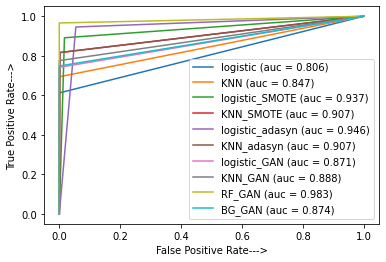

In [ ]:
from sklearn.metrics import roc_curve, auc

logistic_fpr, logistic_tpr, threshold = roc_curve(y_test, prediction_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

KNN_fpr, KNN_tpr, threshold = roc_curve(y_test, prediction_KNN)
auc_KNN = auc(KNN_fpr, KNN_tpr)

logistic_fpr_SMOTE, logistic_tpr_SMOTE, threshold = roc_curve(y_test, prediction_SMOTE_lr)
auc_logistic_SMOTE = auc(logistic_fpr_SMOTE, logistic_tpr_SMOTE)

KNN_fpr_SMOTE, KNN_tpr_SMOTE, threshold = roc_curve(y_test, prediction_SMOTE_KNN)
auc_KNN_SMOTE = auc(KNN_fpr_SMOTE, KNN_tpr_SMOTE)

logistic_fpr_adasyn, logistic_tpr_adasyn, threshold = roc_curve(y_test, prediction_ada_lr)
auc_logistic_adasyn = auc(logistic_fpr_adasyn, logistic_tpr_adasyn)

KNN_fpr_adasyn, KNN_tpr_adasyn, threshold = roc_curve(y_test, prediction_ada_KNN)
auc_KNN_adasyn = auc(KNN_fpr_adasyn, KNN_tpr_adasyn)

RF_fpr, RF_tpr, threshold = roc_curve(y_test, prediction_rf)
auc_RF = auc(RF_fpr, RF_tpr)

BG_fpr, BG_tpr, threshold = roc_curve(y_test, prediction_bg)
auc_BG = auc(BG_fpr, BG_tpr)


#logistic_fpr_GAN_1L, logistic_tpr_GAN_1L, threshold = roc_curve(y_test, prediction_GAN_1L)
#auc_logistic_GAN_1L = auc(logistic_fpr_GAN_1L, logistic_tpr_GAN_1L)

logistic_fpr_GAN, logistic_tpr_GAN, threshold = roc_curve(y_test, prediction_G25K_lr)
auc_logistic_GAN = auc(logistic_fpr_GAN, logistic_tpr_GAN)

KNN_fpr_GAN, KNN_tpr_GAN, threshold = roc_curve(y_test, prediction_G25K_KNN)
auc_KNN_GAN = auc(KNN_fpr_GAN, KNN_tpr_GAN)

RF_fpr_GAN, RF_tpr_GAN, threshold = roc_curve(y_test, prediction_G25K_rf)
auc_RF_GAN = auc(RF_fpr_GAN, RF_tpr_GAN)

BG_fpr_GAN, BG_tpr_GAN, threshold = roc_curve(y_test, prediction_G25K_bg)
auc_BG_GAN = auc(BG_fpr_GAN, BG_tpr_GAN)

plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label='logistic (auc = %0.3f)' % auc_logistic)
plt.plot(KNN_fpr, KNN_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_KNN)
#plt.plot(logistic_fpr_GAN_1L, logistic_tpr_GAN_1L, linestyle='-', label='logistic_GAN_1L (auc = %0.3f)' % auc_logistic_GAN_1L)
plt.plot(logistic_fpr_SMOTE, logistic_tpr_SMOTE, linestyle='-', label='logistic_SMOTE (auc = %0.3f)' % auc_logistic_SMOTE)
plt.plot(KNN_fpr_SMOTE, KNN_tpr_SMOTE, linestyle='-', label='KNN_SMOTE (auc = %0.3f)' % auc_KNN_SMOTE)
plt.plot(logistic_fpr_adasyn, logistic_tpr_adasyn, linestyle='-', label='logistic_adasyn (auc = %0.3f)' % auc_logistic_adasyn)
plt.plot(KNN_fpr_adasyn, KNN_tpr_adasyn, linestyle='-', label='KNN_adasyn (auc = %0.3f)' % auc_KNN_adasyn)
#plt.plot(logistic_fpr_GAN_1L, logistic_tpr_GAN_1L, linestyle='-', label='logistic_GAN_1L (auc = %0.3f)' % auc_logistic_GAN_1L)
plt.plot(logistic_fpr_GAN, logistic_tpr_GAN, linestyle='-', label='logistic_GAN (auc = %0.3f)' % auc_logistic_GAN)
plt.plot(KNN_fpr_GAN, KNN_tpr_GAN, linestyle='-', label='KNN_GAN (auc = %0.3f)' % auc_KNN_GAN)
plt.plot(RF_fpr_GAN, RF_tpr_GAN, linestyle='-', label='RF_GAN (auc = %0.3f)' % auc_RF_GAN)
plt.plot(BG_fpr_GAN, BG_tpr_GAN, linestyle='-', label='BG_GAN (auc = %0.3f)' % auc_BG_GAN)
plt.xlabel('False Positive Rate--->')
plt.ylabel('True Positive Rate--->')

plt.legend()

plt.show()

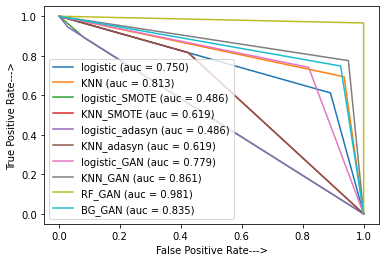

In [ ]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.metrics import plot_precision_recall_curve

logistic_fpr, logistic_tpr, threshold = precision_recall_curve(y_test, prediction_lr)
auc_logistic = auc(logistic_fpr, logistic_tpr)

KNN_fpr, KNN_tpr, threshold = precision_recall_curve(y_test, prediction_KNN)
auc_KNN = auc(KNN_fpr, KNN_tpr)

logistic_fpr_SMOTE, logistic_tpr_SMOTE, threshold = precision_recall_curve(y_test, prediction_SMOTE_lr)
auc_logistic_SMOTE = auc(logistic_fpr_SMOTE, logistic_tpr_SMOTE)

KNN_fpr_SMOTE, KNN_tpr_SMOTE, threshold = precision_recall_curve(y_test, prediction_SMOTE_KNN)
auc_KNN_SMOTE = auc(KNN_fpr_SMOTE, KNN_tpr_SMOTE)

logistic_fpr_adasyn, logistic_tpr_adasyn, threshold = precision_recall_curve(y_test, prediction_ada_lr)
auc_logistic_adasyn = auc(logistic_fpr_adasyn, logistic_tpr_adasyn)

KNN_fpr_adasyn, KNN_tpr_adasyn, threshold = precision_recall_curve(y_test, prediction_ada_KNN)
auc_KNN_adasyn = auc(KNN_fpr_adasyn, KNN_tpr_adasyn)

RF_fpr, RF_tpr, threshold = precision_recall_curve(y_test, prediction_rf)
auc_RF = auc(RF_fpr, RF_tpr)

BG_fpr, BG_tpr, threshold = precision_recall_curve(y_test, prediction_bg)
auc_BG = auc(BG_fpr, BG_tpr)


#logistic_fpr_GAN_1L, logistic_tpr_GAN_1L, threshold = roc_curve(y_test, prediction_GAN_1L)
#auc_logistic_GAN_1L = auc(logistic_fpr_GAN_1L, logistic_tpr_GAN_1L)

logistic_fpr_GAN, logistic_tpr_GAN, threshold = precision_recall_curve(y_test, prediction_G25K_lr)
auc_logistic_GAN = auc(logistic_fpr_GAN, logistic_tpr_GAN)

KNN_fpr_GAN, KNN_tpr_GAN, threshold = precision_recall_curve(y_test, prediction_G25K_KNN)
auc_KNN_GAN = auc(KNN_fpr_GAN, KNN_tpr_GAN)

RF_fpr_GAN, RF_tpr_GAN, threshold = precision_recall_curve(y_test, prediction_G25K_rf)
auc_RF_GAN = auc(RF_fpr_GAN, RF_tpr_GAN)

BG_fpr_GAN, BG_tpr_GAN, threshold = precision_recall_curve(y_test, prediction_G25K_bg)
auc_BG_GAN = auc(BG_fpr_GAN, BG_tpr_GAN)

plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label='logistic (auc = %0.3f)' % auc_logistic)
plt.plot(KNN_fpr, KNN_tpr, linestyle='-', label='KNN (auc = %0.3f)' % auc_KNN)
#plt.plot(logistic_fpr_GAN_1L, logistic_tpr_GAN_1L, linestyle='-', label='logistic_GAN_1L (auc = %0.3f)' % auc_logistic_GAN_1L)
plt.plot(logistic_fpr_SMOTE, logistic_tpr_SMOTE, linestyle='-', label='logistic_SMOTE (auc = %0.3f)' % auc_logistic_SMOTE)
plt.plot(KNN_fpr_SMOTE, KNN_tpr_SMOTE, linestyle='-', label='KNN_SMOTE (auc = %0.3f)' % auc_KNN_SMOTE)
plt.plot(logistic_fpr_adasyn, logistic_tpr_adasyn, linestyle='-', label='logistic_adasyn (auc = %0.3f)' % auc_logistic_adasyn)
plt.plot(KNN_fpr_adasyn, KNN_tpr_adasyn, linestyle='-', label='KNN_adasyn (auc = %0.3f)' % auc_KNN_adasyn)
#plt.plot(logistic_fpr_GAN_1L, logistic_tpr_GAN_1L, linestyle='-', label='logistic_GAN_1L (auc = %0.3f)' % auc_logistic_GAN_1L)
plt.plot(logistic_fpr_GAN, logistic_tpr_GAN, linestyle='-', label='logistic_GAN (auc = %0.3f)' % auc_logistic_GAN)
plt.plot(KNN_fpr_GAN, KNN_tpr_GAN, linestyle='-', label='KNN_GAN (auc = %0.3f)' % auc_KNN_GAN)
plt.plot(RF_fpr_GAN, RF_tpr_GAN, linestyle='-', label='RF_GAN (auc = %0.3f)' % auc_RF_GAN)
plt.plot(BG_fpr_GAN, BG_tpr_GAN, linestyle='-', label='BG_GAN (auc = %0.3f)' % auc_BG_GAN)
plt.xlabel('False Positive Rate--->')
plt.ylabel('True Positive Rate--->')

plt.legend()

plt.show()